 # <center> Twitter Sentiment Analysis on Macys Banning Fur in 2021 </center>
    
<B>Topline:</B> On October 22, 2019 Macy’s announced that it will completely phase out the sale of animal fur from its stores by early 2021, making it the biggest U.S. retailer to ban the controversial product.

Below is the sentiment analysis on the tweets made on Macy's ban of fur.


#### Import the libraries

Import the libraries to autheticate and stream the tweets on real time using Twitter API and store it in the dataframe for further analysis.

The twitter_credentials.py file has the CONSUMER and ACCESS_TOKENS for the twitter app to stream the data.

In [79]:
# Class that allows to listen to the tweets
from tweepy.streaming import StreamListener

# Responsible for authenticating
from tweepy import OAuthHandler

from tweepy import Stream

# File with twitter credentitals
import twitter_credentials as tc

from tweepy import API
from tweepy import Cursor

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import re
from textblob import TextBlob

from datetime import datetime

#### Create the class and method to authenticate the twitter app

In [9]:

class TwitterAuthenticator():
    """
    Twitter Authenticator
    """
    def authenticate_twitter_app(self):
        # Authenticate with CONSUMER cretentials
        auth = OAuthHandler(tc.CONSUMER_KEY, tc.CONSUMER_SECRET_KEY)
        auth.set_access_token(tc.ACCESS_TOKEN, tc.ACCESS_TOKEN_SECRET)
        return auth
        

#### Class and methods to extract the twitter data into a dataframe

- <i> tweets_to_data_frame </i> - method loops over the itereator object returned by the CURSOR API, extract and store the details in a data frame        
- <i> clean_tweet </i> - method to clean the specail characters from the tweet text       
- <i> analyze_sentiment </i> - method to perform sentiment analysis

In [29]:
class TweetAnalyzer():
    """
    Functionality for analyzing and categorizing content from tweets
    """
    def tweets_to_data_frame(self, tweets):
        tweet_data = [[tweet.text, tweet.user.location,tweet.created_at, tweet.favorite_count, tweet.retweet_count] for tweet in tweets]
        df = pd.DataFrame(data=tweet_data, columns=["tweets","location", "date","likes","retweets"])
        return df
    
    def clean_tweet(self,tweet):
        clean_text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet).split())
        return clean_text 
    
    def analyze_sentiment(self, tweet):
        analysis=TextBlob(self.clean_tweet(tweet))
        #return analysis.sentiment.polarity
        
        if analysis.sentiment.polarity > 0:
            return 1
        
        elif analysis.sentiment.polarity == 0:
            return 0
        else:
            return -1

Main program to put all together

In [75]:
# Main part of the program
if __name__ == '__main__':

    tweet_analyzer = TweetAnalyzer()
   
    auth = TwitterAuthenticator().authenticate_twitter_app()
    api = API(auth, wait_on_rate_limit=True)
    
    # Define the search term and the date_since date as variables
    search_words = "#Macys+Fur -filter:retweets"
    #search_words = "#Macys+Fur"
    date_since = "2018-11-16"
    
    tweets = Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(1000)
    
    # To save the tweets text to the data frame
    df = tweet_analyzer.tweets_to_data_frame(tweets)
    df['sentiment'] = np.array([tweet_analyzer.analyze_sentiment(tweet) for tweet in df['tweets']])
    print(df.head(40))
    print(df.shape)
    

                                               tweets  \
0   Will going fur-free move the needle on Macy’s ...   
1   Macy's will stop selling fur by 2021!  The ban...   
2   Macy's goes fur-free. #environmentalism #retai...   
3   #Macys and #Bloomingdales ditch #fur https://t...   
4   Department store #Macys has announced a decisi...   
5   Macy's goes fur-free. #environmentalism #retai...   
6   ***New Episode*** Macy's bans the sale of fur ...   
7   Major win our sweet fur babies. 🥰❤️💯‼️💋 #Vegan...   
8   Huge Victory for our animals! #Macys AND #Bloo...   
9   A sign of the times, Macy's bans the sale of a...   
10  #Macys to Stop Selling Fur Products\nHopefully...   
11  Macy's becomes biggest US retailer to end fur ...   
12  Macy's goes fur-free. #environmentalism #retai...   
13  Macy's and Bloomingdale's to go fur free. Do y...   
14  #Macys to stop selling fur by end of 2020 fisc...   
15  Best news! Thank you @Macys Thank you @Bloomin...   
16  Article on my Facebook page

### Visualizing the data



In [111]:
#print(df.location)

for index, place in df.location.iteritems():
    if re.search("NY|new york|Brooklyn", place, re.IGNORECASE):
        df.location.at[index] = 'NY'
    elif re.search("CA|California|Bay Area", place, re.IGNORECASE):
        df.location.at[index] = 'CA'
    elif re.search("UK", place, re.IGNORECASE):
        df.location.at[index] = 'UK'
    elif re.search("Florida|Orlando", place, re.IGNORECASE):
        df.location.at[index] = 'FL'
    elif re.search("NC", place, re.IGNORECASE):
        df.location.at[index] = 'NC'
    elif re.search("East Coast", place, re.IGNORECASE):
        df.location.at[index] = 'East Coast'
    elif re.search("Pune", place, re.IGNORECASE):
        df.location.at[index] = 'India'
    elif re.search("TX", place, re.IGNORECASE):
        df.location.at[index] = 'TX'
    elif re.search("Pittsburgh|PA", place, re.IGNORECASE):
        df.location.at[index] = 'PA'
    elif re.search("Illinois", place, re.IGNORECASE):
        df.location.at[index] = 'IL'
    elif re.search("Connecticut", place, re.IGNORECASE):
        df.location.at[index] = 'CT'
    elif re.search("Portland", place, re.IGNORECASE):
        df.location.at[index] = 'ME'
    elif re.search("Midwest", place, re.IGNORECASE):
        df.location.at[index] = 'Midwest'
    elif not place:
        df.location.at[index] = 'NA'
    elif re.search("\W|\d",place):
        df.location.at[index] = 'NA'
        
        
#df['date']=df.date.dt.date       

    
#print(df.location)
print(df.head(40))

                                               tweets    location        date  \
0   Will going fur-free move the needle on Macy’s ...          IL  2019-10-26   
1   Macy's will stop selling fur by 2021!  The ban...   Worldwide  2019-10-24   
2   Macy's goes fur-free. #environmentalism #retai...  East Coast  2019-10-23   
3   #Macys and #Bloomingdales ditch #fur https://t...          NY  2019-10-23   
4   Department store #Macys has announced a decisi...          NY  2019-10-23   
5   Macy's goes fur-free. #environmentalism #retai...  East Coast  2019-10-23   
6   ***New Episode*** Macy's bans the sale of fur ...          CA  2019-10-23   
7   Major win our sweet fur babies. 🥰❤️💯‼️💋 #Vegan...          TX  2019-10-23   
8   Huge Victory for our animals! #Macys AND #Bloo...          CA  2019-10-23   
9   A sign of the times, Macy's bans the sale of a...          NA  2019-10-23   
10  #Macys to Stop Selling Fur Products\nHopefully...          CA  2019-10-23   
11  Macy's becomes biggest U

Text(0,0.5,'number of tweets')

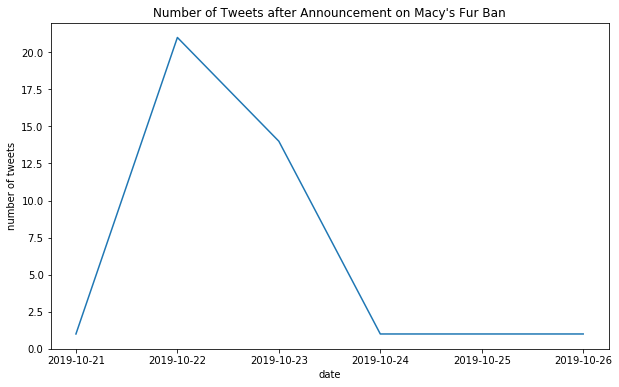

In [100]:
df.groupby('date') ['tweets'].count().plot(figsize=(10,6))
plt.title("Number of Tweets after Announcement on Macy's Fur Ban")
plt.ylabel("number of tweets")

Text(0,0.5,'number of tweets')

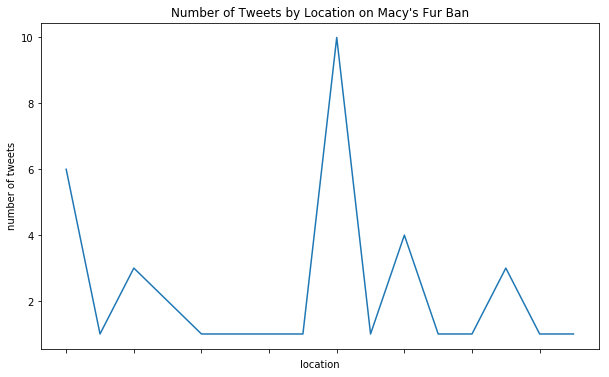

In [112]:
df.groupby('location') ['tweets'].count().plot(figsize=(10,6))
plt.title("Number of Tweets by Location on Macy's Fur Ban")
plt.ylabel("number of tweets")
#plt.xticks(df['location'])

Text(0,0.5,'value')

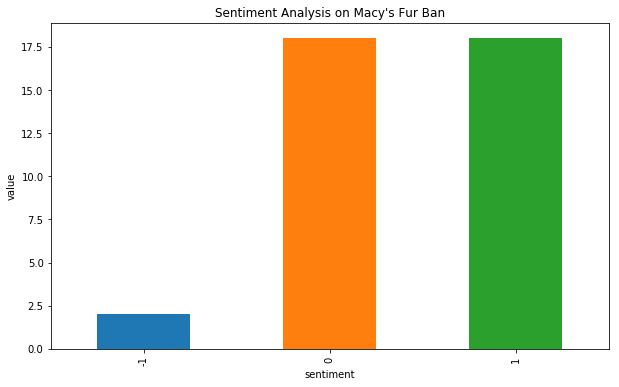

In [146]:

df.groupby('sentiment') ['tweets'].count().plot(kind='bar',figsize=(10,6))
plt.title("Sentiment Analysis on Macy's Fur Ban")
plt.ylabel("value")


In [138]:
type(new_df)

pandas.core.series.Series